In [67]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn import ensemble
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import csv


data = pd.read_csv('hr-analytics.csv')     #讀取檔案
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [68]:
#資料型態和缺失值
print('The type of data:')
print(data.dtypes)
print()
num = data.isna().sum()
print('The number of NaN:')
num

The type of data:
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

The number of NaN:


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [69]:
#由上可知 沒有缺失值 sales、salary非數字
#將非數字進行編碼
data1 = pd.get_dummies(data[["sales","salary"]])
data.drop(["sales","salary"], axis = 1,inplace = True)
data = data.join(data1)
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [70]:
#70%訓練集 30%預測集
temp = data.columns.values.tolist()
temp.remove('left')
x_train = data[temp][:-4500]
x_test = data[temp][-4500:]
y_train = data['left'][:-4500]
y_test = data['left'][-4500:]
#標準化
#x_train = pd.DataFrame(preprocessing.scale(x_train))
#x_test = pd.DataFrame(preprocessing.scale(x_test))

In [71]:
#svm訓練
c = svm.SVC()
c.fit(x_train,y_train)
y_pred = c.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

0.6508888888888889


In [76]:
#decision tree訓練
c = DecisionTreeClassifier(max_depth=10)
c.fit(x_train,y_train)
y_pred = c.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

0.968


#logistic regration訓練
c = linear_model.LogisticRegression()
c.fit(x_train,y_train)
y_pred = c.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

In [77]:
#決策樹模型較適合
#因為logistic 和 svm 都是線性劃分成兩個部分 不能有效處理兩極化的問題 
#決策樹可以處理非線性的特徵 考慮了變量間的交互作用

In [78]:
"""第二題"""

data2 = pd.read_csv('titanic_train.csv')     #讀取檔案
data2

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,3,1,"Murphy, Miss. Katherine ""Kate""",female,NaN,1,0,367230,15.5000,NaN,Q,16,NaN,NaN
1,3,0,"Gallagher, Mr. Martin",male,25.0,0,0,36864,7.7417,NaN,Q,NaN,NaN,"New York, NY"
2,3,1,"Buckley, Mr. Daniel",male,21.0,0,0,330920,7.8208,NaN,Q,13,NaN,"Kingwilliamstown, Co Cork, Ireland New York, NY"
3,1,0,"Guggenheim, Mr. Benjamin",male,46.0,0,0,PC 17593,79.2000,B82 B84,C,NaN,NaN,"New York, NY"
4,3,1,"Sjoblom, Miss. Anna Sofia",female,18.0,0,0,3101265,7.4958,NaN,S,16,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,2,1,"Herman, Mrs. Samuel (Jane Laver)",female,48.0,1,2,220845,65.0000,NaN,S,9,NaN,"Somerset / Bernardsville, NJ"
869,3,0,"Bourke, Miss. Mary",female,NaN,0,2,364848,7.7500,NaN,Q,NaN,NaN,"Ireland Chicago, IL"
870,3,0,"Salonen, Mr. Johan Werner",male,39.0,0,0,3101296,7.9250,NaN,S,NaN,NaN,NaN
871,1,0,"Carrau, Mr. Francisco M",male,28.0,0,0,113059,47.1000,NaN,S,NaN,NaN,"Montevideo, Uruguay"


In [79]:
#觀察資料型態和缺失值
print('The type of data:')
print(data2.dtypes)
print()
num = data2.isna().sum()
print('The number of NaN:')
print(num)
#由上可知
#'sex','ticket','cabin','embarked','boat','home.dest'為非數字型態
#'age','fare','cabin','embarked','boat','body','home.dest'有缺失值


The type of data:
pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

The number of NaN:
pclass         0
survived       0
name           0
sex            0
age          184
sibsp          0
parch          0
ticket         0
fare           1
cabin        665
embarked       1
boat         556
body         791
home.dest    360
dtype: int64


,sex,survived
0,female,0.730
1,male,0.184


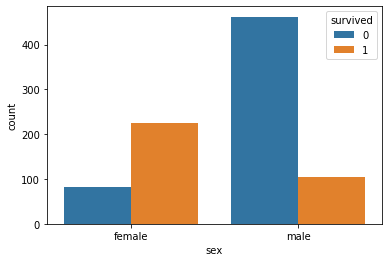

In [80]:
import seaborn as sns
from IPython.display import display
#性別和生存率的關係
sns.countplot(data2['sex'],hue=data2['survived'])
display(data2[['sex','survived']].groupby(['sex'],as_index=False).mean().round(3))
#將性別非數字資料轉換為數字
data2['sex'] = data2['sex'].map({'female':1, 'male':0})

#可以看出男性大多都死亡，女性大部分都存活下來

,pclass,survived
0,1,0.604
1,2,0.402
2,3,0.253


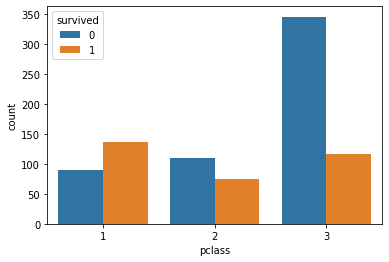

In [81]:
#艙等和生存率的關係
sns.countplot(data2['pclass'],hue=data2['survived'])
display(data2[['pclass','survived']].groupby(['pclass'],as_index=False).mean().round(3))

#可以看出艙等1的旅客生存機率較高，等級越低生存機率越低

,embarked,survived
0,C,0.554
1,Q,0.407
2,S,0.315


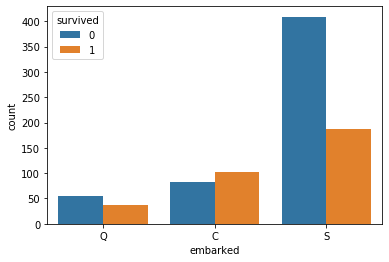

In [82]:
#出發港口和生存率的關係
sns.countplot(data2['embarked'],hue=data2['survived'])
display(data2[['embarked','survived']].groupby(['embarked'],as_index=False).mean().round(3))
#將出發港口非數字資料轉換為數字
data2['embarked'] = data2['embarked'].map({'C':2, 'Q':1, 'S':0})
#缺失值
data2['embarked'].fillna(value=data2['embarked'].mean(), inplace=True)

#可以看出從Ｓ港口出發的人生存機率較低

In [83]:
#計算hist圖的寬度
def find_bins(observations, width):
    minimmum = np.min(observations)
    maximmum = np.max(observations)
    bound_min = -1.0 * (minimmum % width - minimmum)
    bound_max = maximmum - maximmum % width + width
    n = int((bound_max - bound_min) / width) + 1
    bins = np.linspace(bound_min, bound_max, n)
    return bins

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


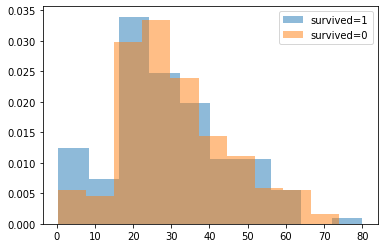

In [84]:
#年齡和生存率的關係
s = data2['age'][data2['survived']==1]
d = data2['age'][data2['survived']==0]
bins = find_bins(data2['age'],0.01)
plt.hist(s,alpha=0.5,label='survived=1',density=1)
plt.hist(d,alpha=0.5,label='survived=0',density=1)
plt.legend(loc='upper right')
plt.show()
#感覺看不出什麼

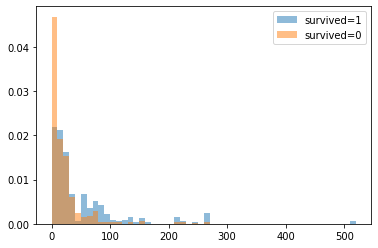

In [85]:
#票價和生存率的關係
s = data2['fare'][data2['survived']==1]
d = data2['fare'][data2['survived']==0]
bins = find_bins(data2['fare'],10)
plt.hist(s,bins,alpha=0.5,label='survived=1',density=1)
plt.hist(d,bins,alpha=0.5,label='survived=0',density=1)
plt.legend(loc='upper right')
plt.show()
#票價高的生存率較高
#缺失值
data2['fare'].fillna(value=data2['fare'].mean(), inplace=True)

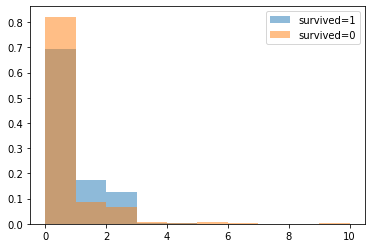

In [86]:
#（父母加小孩的數量）和生存率的關係
s = data2['parch'][data2['survived']==1]
d = data2['parch'][data2['survived']==0]
bins = find_bins(data2['parch'],1)
plt.hist(s,bins,alpha=0.5,label='survived=1',density=1)
plt.hist(d,bins,alpha=0.5,label='survived=0',density=1)
plt.legend(loc='upper right')
plt.show()
#（父母加小孩的數量）高的生存率較高

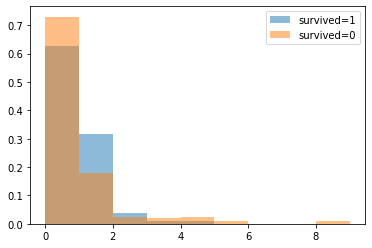

In [87]:
#（兄弟姊妹的數量）和生存率的關係
s = data2['sibsp'][data2['survived']==1]
d = data2['sibsp'][data2['survived']==0]
bins = find_bins(data2['sibsp'],1)
plt.hist(s,bins,alpha=0.5,label='survived=1',density=1)
plt.hist(d,bins,alpha=0.5,label='survived=0',density=1)
plt.legend(loc='upper right')
plt.show()
#（兄弟姊妹的數量）高的生存率較高

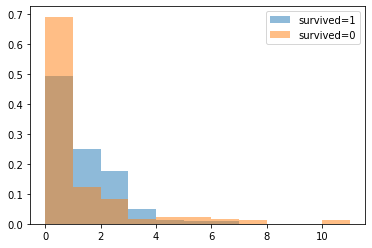

In [88]:
#把（父母＋小孩的數量）和（兄弟姐妹的數量）合併起來一起看
data2['Family'] = data2['parch']+data2['sibsp']
data2.drop(['parch','sibsp'],axis=1,inplace=True)
s = data2['Family'][data2['survived']==1]
d = data2['Family'][data2['survived']==0]
bins = find_bins(data2['Family'],1)
plt.hist(s,bins,alpha=0.5,label='survived=1',density=1)
plt.hist(d,bins,alpha=0.5,label='survived=0',density=1)
plt.legend(loc='upper right')
plt.show()

In [89]:
data2

,pclass,survived,name,sex,age,ticket,fare,cabin,embarked,boat,body,home.dest,Family
0,3,1,"Murphy, Miss. Katherine ""Kate""",1,NaN,367230,15.5000,NaN,1.0,16,NaN,NaN,1
1,3,0,"Gallagher, Mr. Martin",0,25.0,36864,7.7417,NaN,1.0,NaN,NaN,"New York, NY",0
2,3,1,"Buckley, Mr. Daniel",0,21.0,330920,7.8208,NaN,1.0,13,NaN,"Kingwilliamstown, Co Cork, Ireland New York, NY",0
3,1,0,"Guggenheim, Mr. Benjamin",0,46.0,PC 17593,79.2000,B82 B84,2.0,NaN,NaN,"New York, NY",0
4,3,1,"Sjoblom, Miss. Anna Sofia",1,18.0,3101265,7.4958,NaN,0.0,16,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,2,1,"Herman, Mrs. Samuel (Jane Laver)",1,48.0,220845,65.0000,NaN,0.0,9,NaN,"Somerset / Bernardsville, NJ",3
869,3,0,"Bourke, Miss. Mary",1,NaN,364848,7.7500,NaN,1.0,NaN,NaN,"Ireland Chicago, IL",2
870,3,0,"Salonen, Mr. Johan Werner",0,39.0,3101296,7.9250,NaN,0.0,NaN,NaN,NaN,0
871,1,0,"Carrau, Mr. Francisco M",0,28.0,113059,47.1000,NaN,0.0,NaN,NaN,"Montevideo, Uruguay",0


In [90]:
#70%訓練集 30%預測集
temp=['sex','Family','fare','embarked','pclass']
x_train = data2[temp][:-611]
x_test = data2[temp][-611:]
y_train = data2['survived'][:-611]
y_test = data2['survived'][-611:]
#標準化
#x_train = pd.DataFrame(preprocessing.scale(x_train))
#x_test = pd.DataFrame(preprocessing.scale(x_test))

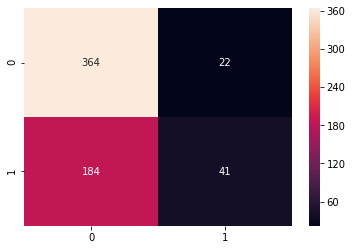

0.662847790507365


In [91]:
#svm訓練
c = svm.SVC()
c.fit(x_train,y_train)
y_pred = c.predict(x_test)
CM = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(CM,annot=True,fmt="d")
plt.show()
accuracy = f1_score(y_test, y_pred, average='micro')
print(accuracy)

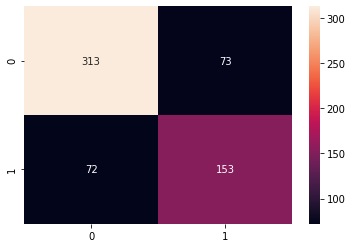

0.762684124386252


In [92]:
#random forest
c = ensemble.RandomForestClassifier(n_estimators = 100)
c.fit(x_train,y_train)
y_pred = c.predict(x_test)
CM = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(CM,annot=True,fmt="d")
plt.show()
accuracy = f1_score(y_test, y_pred, average='micro')
print(accuracy)

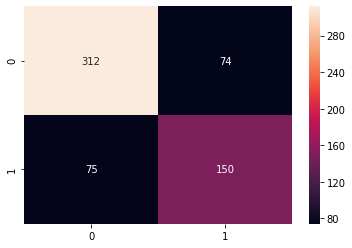

0.7561374795417348


In [93]:
#XGBC
c=XGBClassifier()
c.fit(x_train,y_train)
y_pred = c.predict(x_test)
CM = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(CM,annot=True,fmt="d")
plt.show()
accuracy = f1_score(y_test, y_pred, average='micro')
print(accuracy)

In [94]:
#預測titanic_test.csv
data2_test = pd.read_csv('titanic_test.csv')

#資料前處理
#將出發港口非數字資料轉換為數字
data2_test['embarked'] = data2_test['embarked'].map({'C':2, 'Q':1, 'S':0})
#將性別非數字資料轉換為數字
data2_test['sex'] = data2_test['sex'].map({'female':1, 'male':0})
#缺失值
data2_test['embarked'].fillna(value=data2_test['embarked'].mean(), inplace=True)
#合併'parch'和'sibsp'
data2_test['Family'] = data2_test['parch']+data2_test['sibsp']
data2_test.drop(['parch','sibsp'],axis=1,inplace=True)

#num  = data2_test.isna().sum()
#num

In [95]:
#準備測試資料
temp=['sex','Family','fare','embarked','pclass']
x_train = data2[temp]
y_train = data2['survived']
x_test = data2_test[temp]

#標準化
#x_train = pd.DataFrame(preprocessing.scale(x_train))
#x_test = pd.DataFrame(preprocessing.scale(x_test))
#GXB訓練
c = XGBClassifier()
c.fit(x_train,y_train)
y_pred = c.predict(x_test)

In [96]:
#將預測結果寫入'titanic_pred.csv'
with open('titanic_pred.csv', 'w', newline='') as csvfile:
  # 建立 CSV 檔寫入器
  writer = csv.writer(csvfile)
  # 寫入一列資料
  writer.writerow(['name', 'survival'])
  # 寫入另外幾列資料
  for i in range(436):
      writer.writerow([data2_test['name'][i],y_pred[i]])

In [97]:
#結果
data2_result = pd.read_csv('titanic_pred.csv')
data2_result

,name,survival
0,"Vander Planke, Miss. Augusta Maria",0
1,"van Billiard, Mr. Austin Blyler",0
2,"Abelseth, Mr. Olaus Jorgensen",0
3,"Baclini, Miss. Helene Barbara",1
4,"Landergren, Miss. Aurora Adelia",0
...,...,...
431,"Oreskovic, Miss. Marija",0
432,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",0
433,"Radeff, Mr. Alexander",0
434,"Lefebre, Miss. Jeannie",0
